### Imports

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from IPython.display import clear_output
import numpy as np
import pyaudio
import time
import wave
import sys

import warnings
warnings.filterwarnings("ignore")

### Record

In [22]:
def record_wav(filepath, CHUNK=1024, FORMAT=pyaudio.paInt16, CHANNELS=1, RATE=44100):
    p = pyaudio.PyAudio()
    stream = p.open(
        format = FORMAT,
        channels = CHANNELS,
        rate = RATE,
        input = True,
        frames_per_buffer = CHUNK
    )

    frames = []
    for i in range(0, int(RATE / CHUNK * 2)):
        data = stream.read(CHUNK)
        frames.append(data)

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(filepath, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

### Plotting

In [23]:
def plot_wav(filepath):
    spf = wave.open(filepath,'r')

    #Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, 'Int16')


    #If Stereo
    if spf.getnchannels() == 2:
        sys.exit(0)

    plt.figure(1)
    plt.title('Signal Wave...')
    plt.plot(signal)
    plt.show()

### Settings

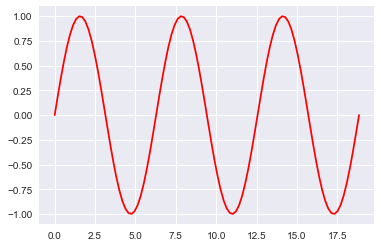

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

In [24]:
### Configure
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
filename = "temp.wav"

### Main
while True:
    clear_output()
    record_wav(filename)
    plot_wav(filename)
    time.sleep(.1)

KeyboardInterrupt: 